# Understanding different types of customers at a Mall using Clustering Algorithm

### First, we convert the data from pdf format to csv format for ease of operation

In [10]:
import tabula

In [11]:
tabula.convert_into("dataset.pdf", "dataset.csv", output_format="csv", pages='all')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income(INR),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dropping the CustomerID column as it is irrelevant to the context

In [19]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [20]:
df.head()

,Gender,Age,Annual Income(INR),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Plotting the age frequency of all customers

#### Let's use violin plot to get a representation of frequency in age. 
#### From Violin plot we can get the following representation - 
##### - Median (the white dot at the center)
##### - Interquartile range (the black bar in the center of violin)
##### - The lower/upper adjacent values (the black lines stretched from the bar)

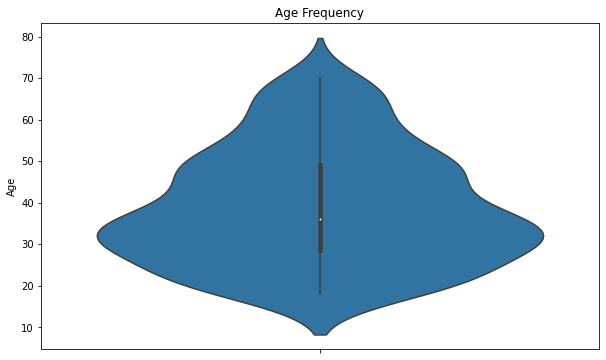

In [21]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

### Next, let's make a box plot of spending score and annual income to better visualize the distribution range.
#### The range of spending score is clearly more than the annual income range

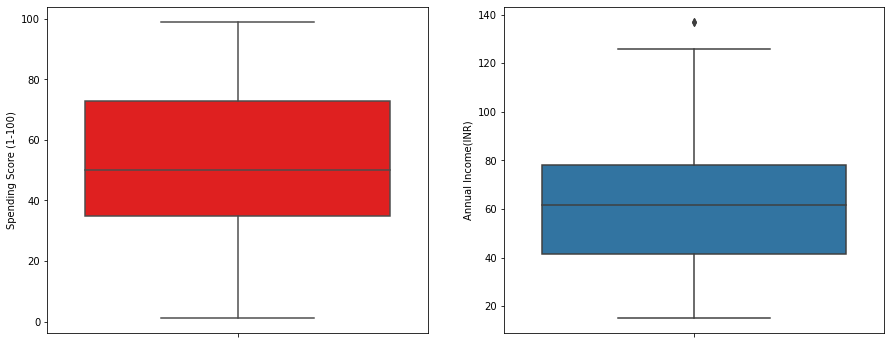

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income(INR)"])
plt.show()

### Next, I made a bar plot to check the distribution of male and female population in the dataset. 
#### The female population clearly outnumbers the male counterpart.

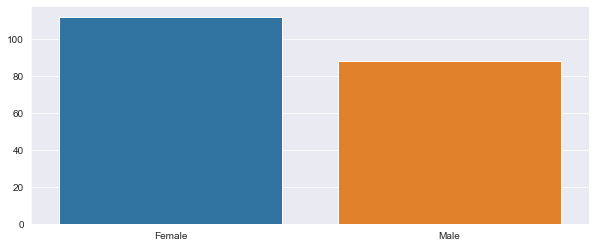

In [23]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Next, I made a bar plot to check the distribution of number of customers in each age group. 
#### Clearly the 26–35 age group outweighs every other age group.

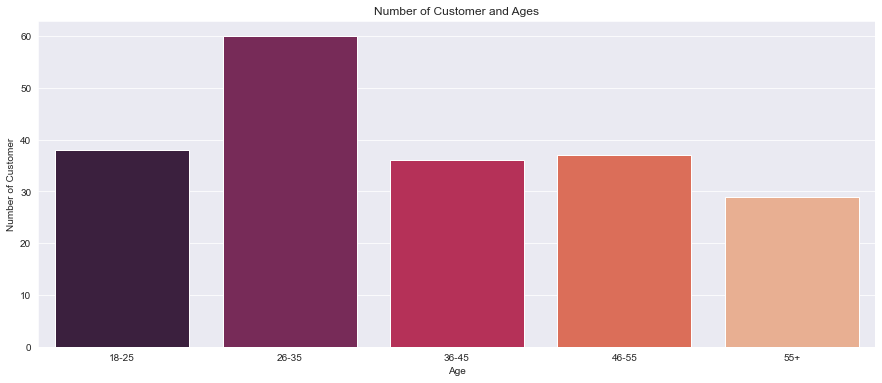

In [24]:
age18_25 = df.Age[(df.Age<=25)&(df.Age>=18)]
age26_35 = df.Age[(df.Age<=35)&(df.Age>=26)]
age36_45 = df.Age[(df.Age<=45)&(df.Age>=36)]
age46_55 = df.Age[(df.Age<=55)&(df.Age>=46)]
age55above = df.Age[df.Age>=56]

x= ["18-25","26-35","36-45","46-55","55+"]
y= [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### I continued with making a bar plot to visualize the number of customers according to their spending scores. The majority of the customers have spending score in the range 41–60.

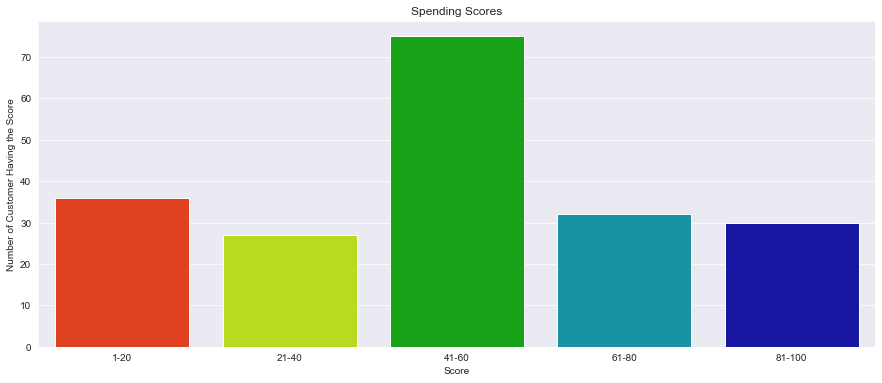

In [25]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]

ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

### I also made a bar plot to visualize the number of customers according to their annual income. The majority of the customers have annual income in the range 60000 and 90000

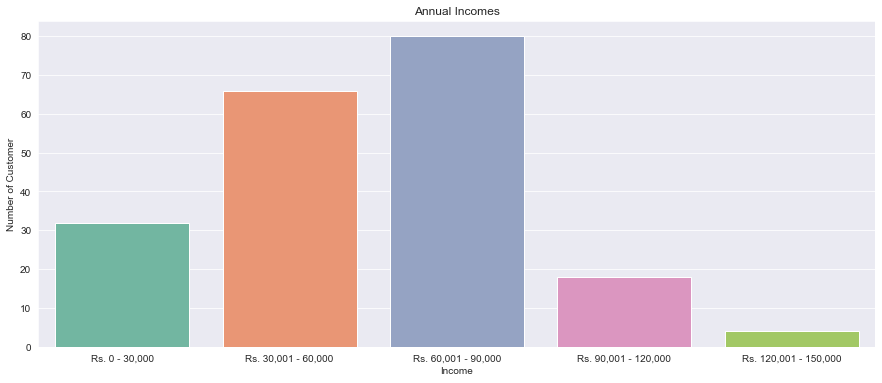

In [26]:
ai0_30 = df["Annual Income(INR)"][(df["Annual Income(INR)"] >= 0) & (df["Annual Income(INR)"] <= 30)]
ai31_60 = df["Annual Income(INR)"][(df["Annual Income(INR)"] >= 31) & (df["Annual Income(INR)"] <= 60)]
ai61_90 = df["Annual Income(INR)"][(df["Annual Income(INR)"] >= 61) & (df["Annual Income(INR)"] <= 90)]
ai91_120 = df["Annual Income(INR)"][(df["Annual Income(INR)"] >= 91) & (df["Annual Income(INR)"] <= 120)]
ai121_150 = df["Annual Income(INR)"][(df["Annual Income(INR)"] >= 121) & (df["Annual Income(INR)"] <= 150)]

aix = ["Rs. 0 - 30,000", "Rs. 30,001 - 60,000", "Rs. 60,001 - 90,000", "Rs. 90,001 - 120,000", "Rs. 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = aix, y = aiy, palette = "Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

### Next I plotted Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value.

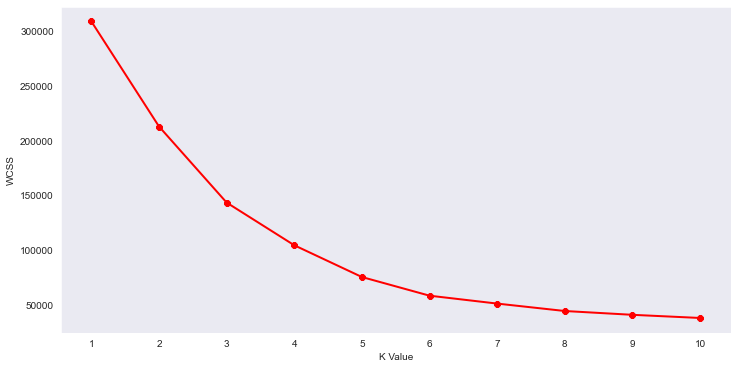

In [27]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

### The optimal K value is found to be 5 using the elbow method.

### Finally I made a 3D plot to visualize the spending score of the customers with their annual income. The data points are separated into 5 classes which are represented in different colours as shown in the 3D plot.

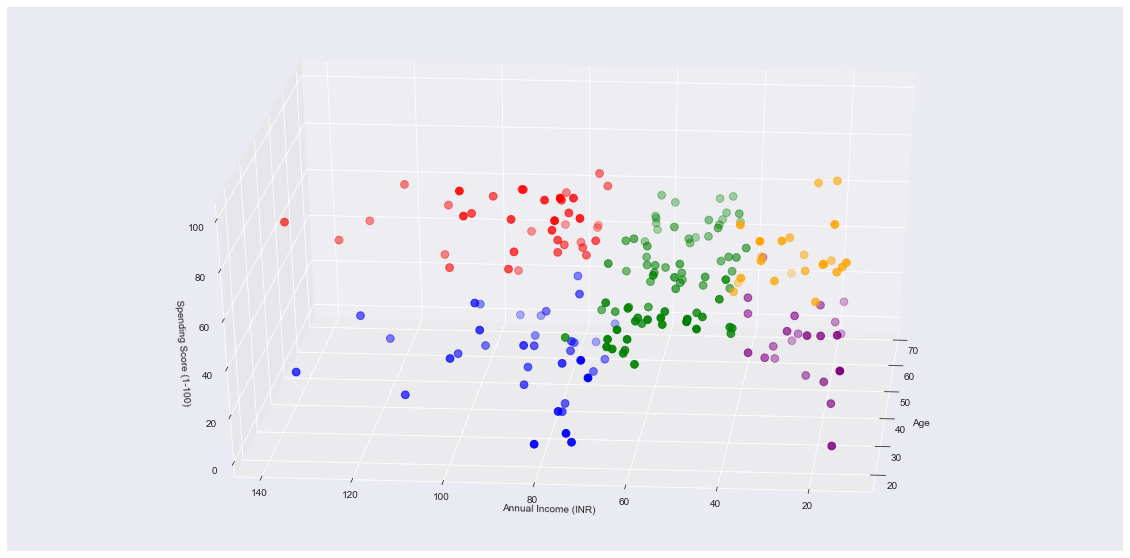

In [31]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df.Age[df.label == 0], df["Annual Income(INR)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income(INR)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income(INR)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income(INR)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income(INR)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (INR)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

#### Hence, we can infer that, considering the age, gender and spending index of customers visiting the mall, the customers can be segmented into 5 distinct categories. 